# matplotlib 라이브러리 자유자재로 사용하기

04-1에서 앤스콤 4분할 그래프를 그릴 때 제목을 추가하기 위해 set_title 메서드를 사용했었습니다. 이밖에도 matplotlib 라이브러리에는 그래프를 그리기 위한 다양한 메서드가 준비되어 있습니다.

## 기초 그래프 그리기

seaborn 라이브러리에는 tips라는 데이터 집합이 있습니다. tips 데이터 집합은 어떤 식당에서 팁을 지불한 손님의 정보를 모아둔 것입니다. tips 데이터 집합을 사용해 다양한 그래프를 그려보겠습니다. 

+ 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프

1.tips 데이터 집합을 불러와 변수 tips에 저장합니다. tips 데이터프레임은 지불 금액, 팁, 성별, 흡연 유무, 요일,시간, 전체 인원 정보를 담고 있습니다.

In [2]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")

In [3]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


2.히스토그램은 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용하는 그래프 입니다. 이때 데이터프레임의 total_bill, tip 등의 열을 변수라고 부르기도 합니다. 그리고 변수를 하나만 사용해서 그린 그래프를 '일변량 그래프'라고 부릅니다.

3.기본 틀(fig)을 마련하고 그래프 격자(axes1)를 구성하는 것까지는 앞에서 진행한 것과 동일합니다.

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


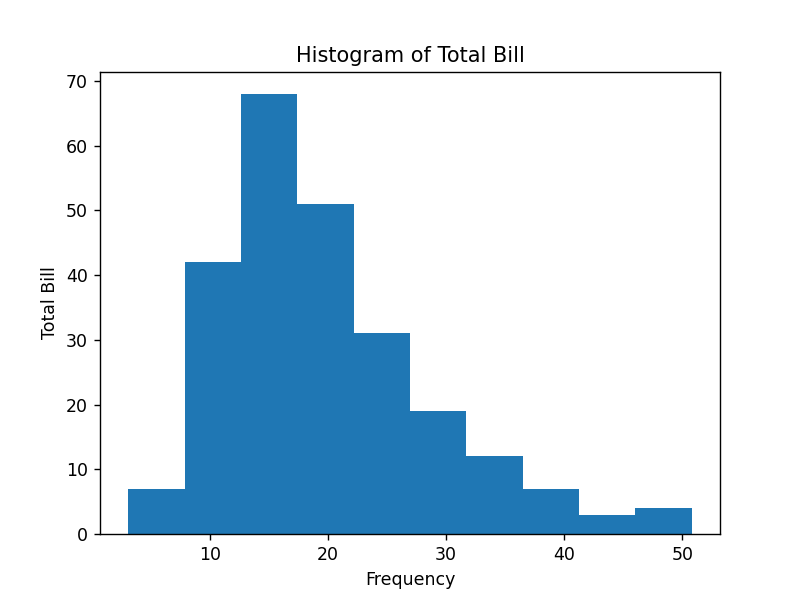

In [6]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

4.hist 메서드에 total_bill 열을 전달하면 히스토그램이 만들어집니다. 이때 x축의 간격은 bins 인잣값으로 조정할 수 있습니다. bins 인잣값을 10으로 지정하면 x축의 간격을 10으로 조정할 수 있습니다. 나머지는 그래프의 제목과 x, y축의 제목을 추가하는 코드입니다.

<IPython.core.display.Javascript object>


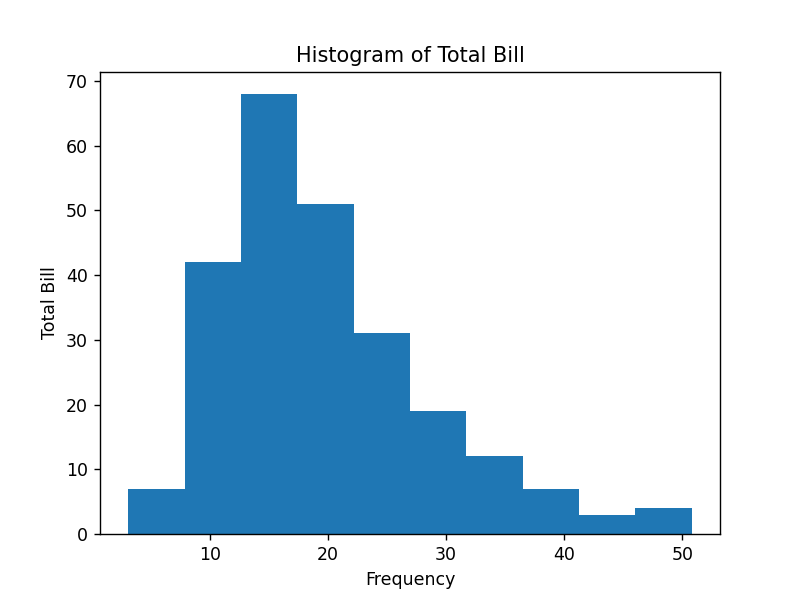

In [7]:
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

5.이번에는 산점도 그래프를 그려보겠습니다. 산점도 그래프는 변수 2개를 사용해서 만드는 그래프이며 변수 2개를 사용하기 때문에 통계 용어로 '이변량 그래프'라고 부릅니다. 다음은 total_bill 열에 따른 tip 열의 분포를 나타낸 산점도 그래프입니다.

6.기본 틀과 그래프 격자를 만들고 scatter 메서드에 total_bill, tips 열을 전달하면 산점도 그래프가 나타납니다.

<IPython.core.display.Javascript object>


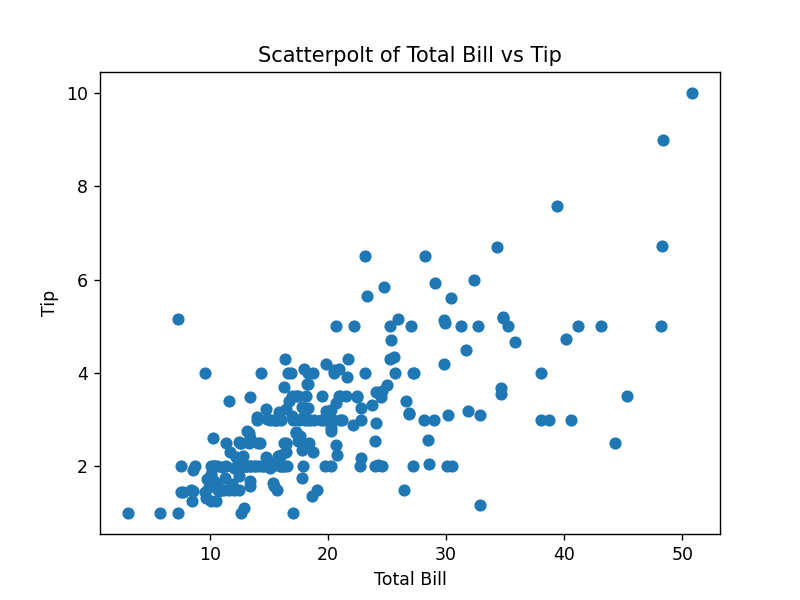

Text(0, 0.5, 'Tip')

In [10]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterpolt of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

7.이번에는 박스 그래프를 그려보겠습니다. 박스 그래프는 이산형 변수와 연속형 변수를 함께 사용하는 그래프입니다. 이산형 변수란 Female,Male과 같이 명확하게 구분되는 값을 의미하고, 연속형 변수란 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미합니다.

8.boxplot 메서드를 사용하면 박스 그래프를 그릴 수 있습니다. boxplot 메서드의 첫 번째 인자로 전달하는 값이 조금 복잡해 보입니다. tips 데이터프레임에서 성별이 Female인 데이터와 Male인 데이터에서 tip 열 데이터만 추출하여 리스트에 담아 전달한 것입니다. 두 번째 인자에는 labels 인잣값으로 성별을 구분하기 위한 이름을 추가합니다.

<IPython.core.display.Javascript object>


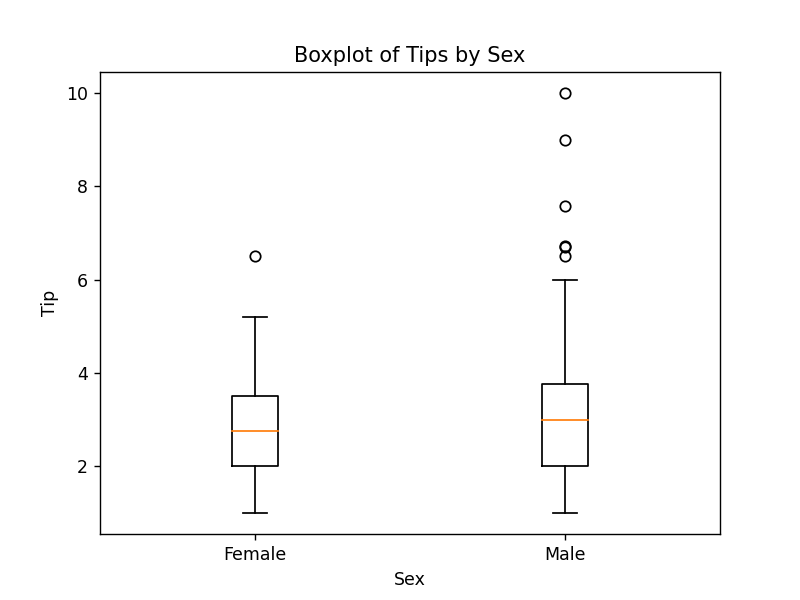

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [13]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
               labels=['Female', 'Male'])
               
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

## 다변량 그래프 그리기

앞에서 2개의 변수를 사용한 그래프를 이변량 그래프라고 했습니다. 그러면 3개 이상의 변수를 사용한 그래프는 무엇이라고 할까요? 바로 '다변량 그래프' 라고 부릅니다. 그러면 다변량 그래프가 왜 필요할까요?

### 다변량 그래프가 필요한 이유

앞에서는 지불 금액(total_bill)과 팁(tip)만을 사용하여 산점도 그래프를 그렸습니다. 만약 여기에 성별을 추가하여 산점도 그래프를 표현하려면 어떻게 해야 할까요? 점의 색상을 다르게 하면 됩니다. 만약 식사 비용을 추가한다면 점의 크기를 다르게 하는 방법으로 산점도 그래프를 표현할 수 있습니다. 이렇게 3개 이상의 변수를 사용하는 다변량 그래프는 적재적소에 맞는 그래프 요소를 추가하여 그래프를 표현해야 합니다.

## 다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프

1.앞에서 실습한 산점도 그래프(scatter_plot)에 성별을 새 변수로 추가해 보겠습니다. 성별은 산점도 그래프에서 색상으로 구분하면 적당합니다. 하지만 Female, Male과 같은 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용할 수 없습니다. 0, 1과 같은 정수를 사용해야 합니다. 따라서 각 문자열을 정수로 치환하는 함수를 만들어야 합니다. 다음은 여성(Famale)인 경우 0을 반환하고 남성(Male)인 경우 1을 반환하는 함수입니다.

In [14]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    
    else:
        return 1

2.이제 recode_sex 메서드가 반환한 값(0, 1)을 데이터프레임에 추가하면 됩니다. 다음은 recode_sex 함수가 반환한 값(0, 1)을 데이터프레임에 sex_color 열을 새로 생성하여 추가한 것입니다. 이때 sex 열에 recode_sex 함수를 브로드캐스팅하기 위하여 apply 메서드를 사용했습니다.

In [15]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

3.그래프를 그리는 김에 테이블당 인원 수(size)도 산점도 그래프에 추가해 보죠. 테이블당 인원 수는 점의 크기로 표현하면 적당합니다. 다음은 scatter 메서드에 s, c 인잣값으로 테이블당 인원 수와 성별의 치환값을 전달한 것입니다.

<IPython.core.display.Javascript object>


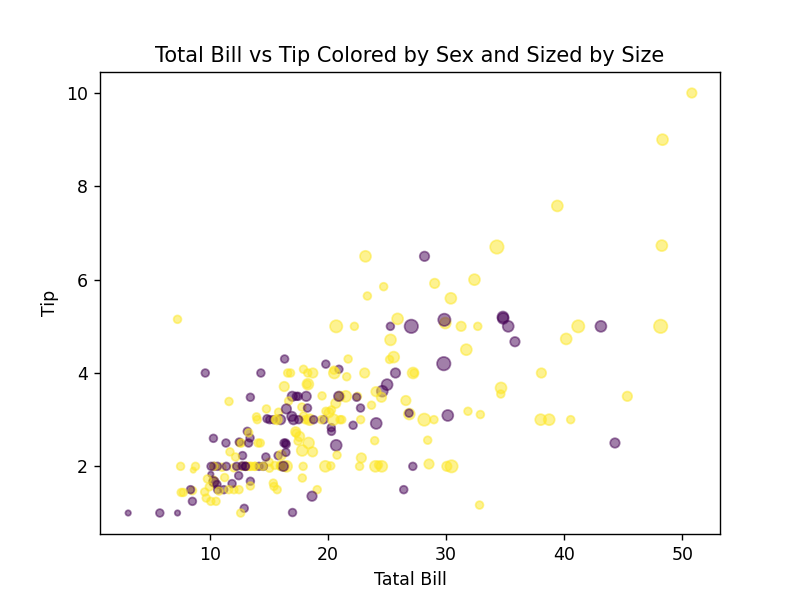

Text(0, 0.5, 'Tip')

In [16]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha=0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Tatal Bill')
axes1.set_ylabel('Tip')